Данные, которые нужно использовать для выполнения задания, возьмите [здесь](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data).

Данные расположены в двух таблицах: **penguins_iter** и **penguins_size**. Для этой лабораторной работы вам понадобится только таблица **penguins_size**.

**penguins_size** содержит следующую информацию:
* `species`: вид, к которому относится пингвин
* `culmen_length_mm`: длина клюва
* `culmen_depth_mm`: глубина клюва
* `flipper_length_mm`: длина ласт
* `body_mass_g`: масса тела
* `island`: название острова, на котором пингвин обитает
* `sex`: пол пингвина


1. Загрузите файл с данными к себе на Гугл диск и подключите его в Google Colab через `mount.drive`.
2. Выведите общую статистику по всем числовым и нечисловым столбцам с помощью метода `describe()`.
3. Узнайте размеры датасета с помощью свойство `shape`.
4. Выведите 4 первые строки датасета.

In [3]:
import pandas as pd
#from google.colab import drive

#drive.mount('/content/drive')
#table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/penguins_size.csv')
table = pd.read_csv("penguins_size.csv")
display(table.describe())
display(table.shape)
fourLines = table.head(4)
display(fourLines)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


(344, 7)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


# Задание 1 (1 балл)
1. Узнайте, сколько видов пингвинов представлено в таблице.
2. Посчитайте долю пингвинов каждого вида.
3. Выведите количество пингвинов, обитающих на каждом из островов.

In [5]:
wid = table["species"].value_counts()
print ('Amount of species ' + str(len(wid)))
smm = 0
for i in range(len(wid)):
  smm += wid[i]
print("Parts")
print(wid/smm)
print("Islands")
print(table["island"].value_counts())

Amount of species 3
Parts
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64
Islands
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


# Задание 2 (1 балл)
1. Найдите id пингвина с самым длинным клювом и с самым коротким. Выведите всю информацию о каждом из этих пингвинов в виде одной таблицы.
2. Посчитайте, насколько самый длинный клюв длиннее самого короткого.

In [6]:
shortest = table["culmen_length_mm"].min()
longest = table["culmen_length_mm"].max()
nt = table[(table["culmen_length_mm"] == shortest) | (table["culmen_length_mm"] == longest)]
display (nt)
print ("delta " + str(longest - shortest))

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


delta 27.5


# Задание 3 (1 балл)
1. Постройте корреляционную матрицу для значений столбцов `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`. 
2. Результат покажите на тепловой карте (heatmap). Требуется построить график, а не раскрасить получившуюся в первом пункте таблицу.

<AxesSubplot: >

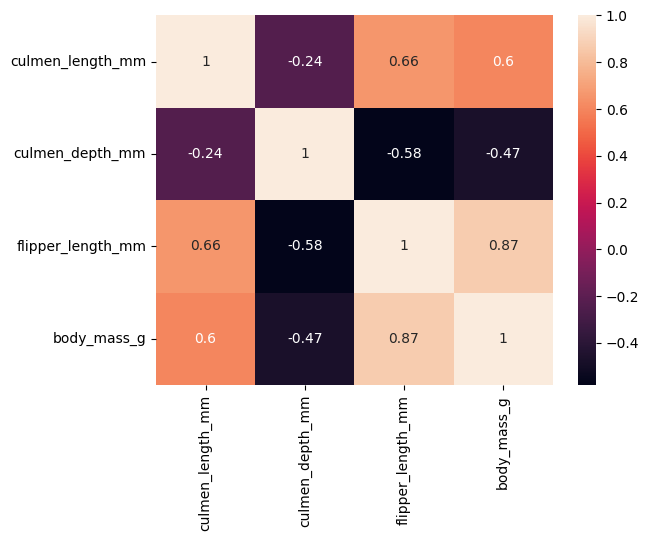

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

nt = table[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
corred = nt.corr().round(2)
sns.heatmap(corred, annot = True)

# Задание 4 (2 балла)
1. О пингвинах какого вида в таблице больше всего недостающих данных? (Строк с `NaN`)
2. Какой информации о пингвинах чаще всего не хватает?

In [11]:
specif = table["species"].unique()
maximum = 0
vid = ""
for i in range(len(specif)):
  newT = table[(table["species"] == specif[i])]
  nans = newT.isnull().sum().sum()
  if nans > maximum:
    maximum = nans
    vid = specif[i]
print("Больше всего строк с NaN о виде:  " + vid)


cols = table.columns
maxMD = table.isnull().sum(axis = 0).max()
col = ""
for i in range (len(cols)):
  newT = table[(cols[i])]
  nans = newT.isnull().sum().sum()
  if nans == maxMD:
    col = cols[i]
print ("Больше всего информации отсутствует о: " + str(col))

Больше всего строк с NaN о виде:  Adelie
Больше всего информации отсутствует о: sex


# Задание 5 (2 балла)
1. По данным из таблицы узнайте, равномерно ли демографиески (процент мужских и женских особей) пингвины распределены по каждому из островов. Считаем, что равномерно, если разница составляет не более 3%. Разницу нужно посчитать не между числами, а между процентами.
2. Результат покажите на столбиковой диаграмме.

array(['Torgersen -Равномерное распределение: 2.128%',
       'Biscoe -Равномерное распределение: 1.84%',
       'Dream -Равномерное распределение: 0.813%'], dtype=object)

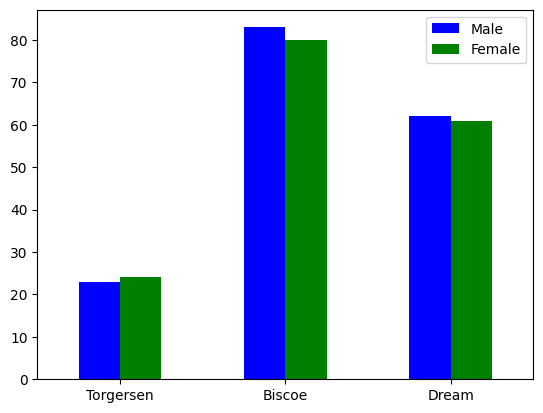

In [12]:
ind = table["island"].unique()
male = table[(table["sex"] == "MALE")]
female = table[(table["sex"] == "FEMALE")]
m = []
f = []
for i in range(len(ind)):
  newM = male[(male["island"] == ind[i])]
  newF = female[(female["island"] == ind[i])]
  m.append(len(newM))
  f.append(len(newF))
menWomen = pd.DataFrame({"Male": m, "Female": f}, index = ind)
menWomen.plot.bar(color = ["blue", "green"], rot = 0)

for i in range(len(ind)):
  perc = abs(m[i] / (m[i] + f[i]) - f[i] / (m[i] + f[i]))
  if  perc <= 0.03:
    ind[i] += " -Равномерное распределение: "
  else:
    ind[i] += " -Неравномерное распределение: "
  perc *= 100
  ind[i] += str(round(perc, 3)) + "%"
display(ind)

# Задание 6 (2 балла)
1. Считая, что длина плавника пингвина составляет треть его роста, рассчитайте индекс массы тела каждого пингвина. Определите самый крупный вид.
2. В каком количестве популяция этого вида представлена на каждом из островов? Результат покажите на круговой диаграмме.

The biggest pengiun: Gentoo
Torgersen: 0
Biscoe: 124
Dream: 0


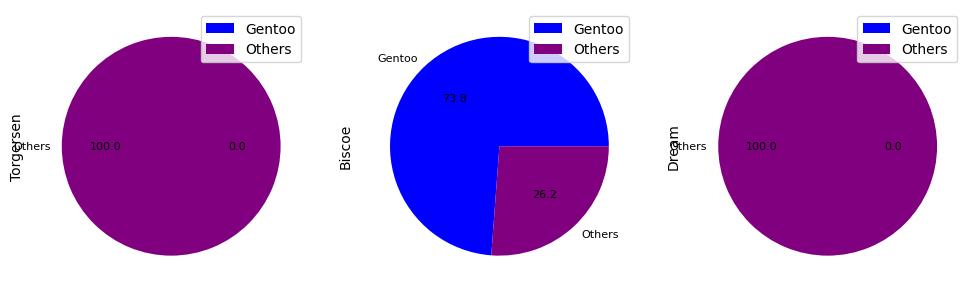

In [14]:
spec = table["species"].unique()
maxInd = 0
bigPin = ""
for i in range(len(spec)):
  nt = table[(table["species"] == spec[i])] 
  ind = (nt["body_mass_g"] / (nt["flipper_length_mm"] * 3)**2 ).mean()
  if ind > maxInd:
    maxInd = ind
    bigPin = spec[i]
print ("The biggest pengiun: " + bigPin)
ind = table["island"].unique()
fig, axes = plt.subplots(nrows = 1, ncols = len(ind))
theBig = table[(table["species"] == bigPin)]
others = table[(table["species"] != bigPin)]
indexes = [bigPin, "Others"]
for i in range(len(ind)):
  amount = []
  newBig = theBig[(theBig["island"] == ind[i])]
  amount.append(len(newBig))
  newOth = others[(others["island"] == ind[i])]
  amount.append(len(newOth))
  newDf = pd.DataFrame({"": amount}, index = indexes)
  print (ind[i] + ": " + str(len(newBig)))
  newDf.plot.pie(ax = axes[i], y = "", colors = ["blue", "purple"], autopct = "%.1f", fontsize = 8, figsize = (12, 12), label = ind[i])
  amount.clear()